# Study how ctrb. values vary under the influence of normalization.
There are three stages of normalization in the PREVENT study.
1. Volume normalization - normalize edge weight based on voxel volume
2. Mean edge weight - divide entire network by the mean (avg) edge weight of the network
3. Eigenvalue normalization - divide network matrix A by lambda_max(A)+1.

The question we want to know is how does each stage of this normalization impacts the ctrb. values.
Control theory "requires" (?) the network matrix to be "Schur stable".
- Not sure what this means!!! Read lit.
- What happens to control values if a network is not stable?
- Does a structural brain connectome ever become "Schur stable"?
- If it does (in our case), at which stage of the normalization does it become Schur stable?
    - Expect step 3 to make it schur stable.

This document will be seperated into 3 main sections. 1 section for each of the normalization stages listed above.
Tasks:
- [ ] Explore how Volume normalization influences ctrb values
- [ ] Explore how Mean edge weight normalization influences ctrb values
- [ ] Explore how Eigenvalue normalization influences ctrb values

# Volume normalization
- [X] Load un-volume normalized data for each individual
- [X] Compute avg. and modal ctrb. values for each individual (WITHOUT e-value normalization)
- [X] Compute avg. and modal ctrb. values for each VOL. normalized individual (WITHOUT e-value normalization)
- [X] See results record in Variability of Ctrb.pptx. s

Statistics:
- [X] Plot ctrb. value against rank of weighted degree

In [3]:
import numpy as np
import networkx as nx
import importlib
import controllability as ctrb
import Prevent.PREVENT_functions as prev_fct
from tqdm import tqdm
import matplotlib.pyplot as plt
import scipy.stats
import pandas as pd
import Towlson_group_code.data_io as myFunc
importlib.reload(ctrb)
importlib.reload(prev_fct)
TIMES = ['bl', 'Y1', 'Y3', 'Y5']
PICKLE_PATH = '../../PREVENT_Study/pickles/'
FIGURE_PATH = '../../PREVENT_Study/figures/'

100%|██████████| 631/631 [00:19<00:00, 31.86it/s]


Number of bad files:  19
Number of good files:  338


100%|██████████| 631/631 [00:08<00:00, 70.44it/s] 


Number of bad files:  15
Number of good files:  165


100%|██████████| 631/631 [00:02<00:00, 231.86it/s]


Number of bad files:  1
Number of good files:  52


100%|██████████| 631/631 [00:01<00:00, 328.85it/s]


Number of bad files:  0
Number of good files:  38
Saved to ../PREVENT_Study/pickles/Non_Normalized_Connectomes.pkl-2023-01-30.pkl.


In [12]:
# plt.style.use('ggplot')
SAVE_FLAG = True
metadata, regionList = prev_fct.load_meta_data()
plot_axis = {'bl': (0,0), 'y1': (0,1), 'y3': (1,0), 'y5': (1,1)}
individual_data = myFunc.load_from_pickle(PICKLE_PATH, 'Normalized_Connectomes.pkl')
rank_type = 'avgCtrb'
xlabel = 'Rank of weighted degree (avg) '
ylabel = f'{rank_type} Controllability (avg)'
FIGURE_PATH = '../PREVENT_Study/figures/ctrb_variability/Vol/'
for patient_type in ['HC', 'P']:
    fig, axs = plt.subplots(2, 2, figsize=(15, 15))
    if patient_type == 'HC':
        color = "tab:blue"
    if patient_type == 'P':
        color = 'tab:orange'
    for time in ['bl', 'y1', 'y3', 'y5']:
        data = individual_data[patient_type+time]
        # Average ctrb. values per region
        avg_y = {r: 0.0 for r in regionList}
        avg_x = {r: 0.0 for r in regionList}
        for pid, G in data.items():
            for reg, val in nx.get_node_attributes(G, 'weightRank').items():
                avg_x[reg] += val
            for reg, val in nx.get_node_attributes(G, rank_type).items():
                avg_y[reg] += val
        n = len(data)
        if n == 0:
            print("n is 0", patient_type, time)
        y = np.array([v/n for v in avg_y.values()])
        x = np.array([v/n for v in avg_x.values()])
        slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
        fig.suptitle(patient_type)
        # title = time + " " + f'(r={r:.2f}, p={p:.2e})'
        title = time
        axs[plot_axis[time][0], plot_axis[time][1]].scatter(x, y, linewidth=0, c=color, alpha=0.7)
        # axs[plot_axis[time][0], plot_axis[time][1]].plot(x, intercept + slope * x, c='red')
        axs[plot_axis[time][0], plot_axis[time][1]].set_xlabel(xlabel, fontsize=16)
        axs[plot_axis[time][0], plot_axis[time][1]].set_ylabel(ylabel, fontsize=16)
        axs[plot_axis[time][0], plot_axis[time][1]].set_title(title, fontsize=16, color='black')

        if time == 'bl':
            print(min(y), max(y))
    fig.suptitle(patient_type, color='black')
    if SAVE_FLAG:
        figName = f'{FIGURE_PATH}{patient_type}-{rank_type}.png'
        print("Saving...", figName)
        plt.savefig(figName, dpi=300, facecolor=fig.get_facecolor(), edgecolor='none', bbox_inches='tight')
        plt.close(fig)

-0.050202864720593716 0.47015257828030366
Saving... ../PREVENT_Study/figures/ctrb_variability/Vol/HC-avgCtrb.png
-5.987016317240246 0.8224410449252593
Saving... ../PREVENT_Study/figures/ctrb_variability/Vol/P-avgCtrb.png


# Mean Edge Weight
- [ ] Load volume normalized data for each individual
- [ ] Compute avg. and modal ctrb. values for each individual (WITHOUT e-value normalization)
- [ ] Gather stats
- [ ] Store computed ctrb. values into pickle for comparisons later.

Statistics:
- [ ] What's the max and min of the ctrb. value?
- [ ] Plot ctrb. value against rank of weighted degree

In [18]:
# plt.style.use('ggplot')
SAVE_FLAG = False
# Load region list
metadata, regionList = prev_fct.load_meta_data()
plot_axis = {'bl': (0,0), 'y1': (0,1), 'y3': (1,0), 'y5': (1,1)}
individual_data = myFunc.load_from_pickle(PICKLE_PATH, 'Normalized_Connectomes.pkl')
rank_type = 'avgCtrb'
xlabel = 'Rank of weighted degree (avg) '
ylabel = f'{rank_type} Controllability (avg)'
FIGURE_PATH = '../PREVENT_Study/figures/ctrb_variability/Vol_Eval/'
for patient_type in ['HC', 'P']:
    fig, axs = plt.subplots(2, 2, figsize=(15, 15))
    if patient_type == 'HC':
        color = "tab:blue"
    if patient_type == 'P':
        color = 'tab:orange'
    for time in ['bl', 'y1', 'y3', 'y5']:
        data = individual_data[patient_type+time]
        # Average ctrb. values per region
        avg_y = {r: 0.0 for r in regionList}
        avg_x = {r: 0.0 for r in regionList}
        for pid, G in data.items():
            for reg, val in nx.get_node_attributes(G, 'weightRank').items():
                avg_x[reg] += val
            for reg, val in nx.get_node_attributes(G, rank_type).items():
                avg_y[reg] += val
        n = len(data)
        if n == 0:
            print("n is 0", patient_type, time)
        y = np.array([v/n for v in avg_y.values()])
        x = np.array([v/n for v in avg_x.values()])
        slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
        fig.suptitle(patient_type)
        # title = time + " " + f'(r={r:.2f}, p={p:.2e})'
        title = time
        axs[plot_axis[time][0], plot_axis[time][1]].scatter(x, y, linewidth=0, c=color, alpha=0.7)
        # axs[plot_axis[time][0], plot_axis[time][1]].plot(x, intercept + slope * x, c='red')
        axs[plot_axis[time][0], plot_axis[time][1]].set_xlabel(xlabel, fontsize=16)
        axs[plot_axis[time][0], plot_axis[time][1]].set_ylabel(ylabel, fontsize=16)
        axs[plot_axis[time][0], plot_axis[time][1]].set_title(title, fontsize=16, color='black')

        if time == 'bl':
            print(min(y), max(y))
    fig.suptitle(patient_type, color='black')
    if SAVE_FLAG:
        figName = f'{FIGURE_PATH}{patient_type}-{rank_type}.png'
        print("Saving...", figName)
        plt.savefig(figName, dpi=300, facecolor=fig.get_facecolor(), edgecolor='none', bbox_inches='tight')
        plt.close(fig)

1.0045465408643806 166.04355021314123
Saving... ../PREVENT_Study/figures/ctrb_variability/Vol_Eval/HC-avgCtrb.png
1.0048159265018761 159.90953067240974
Saving... ../PREVENT_Study/figures/ctrb_variability/Vol_Eval/P-avgCtrb.png


# Eigenvalue normalization
Already computed this! Just load in data from before.
- [X] Load ctrb. data from PREVENT study.
- [ ] Compute avg. and modal ctrb. values for each individual
- [ ] Gather stats
- [ ] Store computed ctrb. values into pickle for comparisons later.

Statistics:
- [ ] What's the max and min of the ctrb. value?
- [ ] Plot ctrb. value against rank of weighted degree

1.0007709327496772 4.969757689606667
1.0005607055254215 4.458015346409192


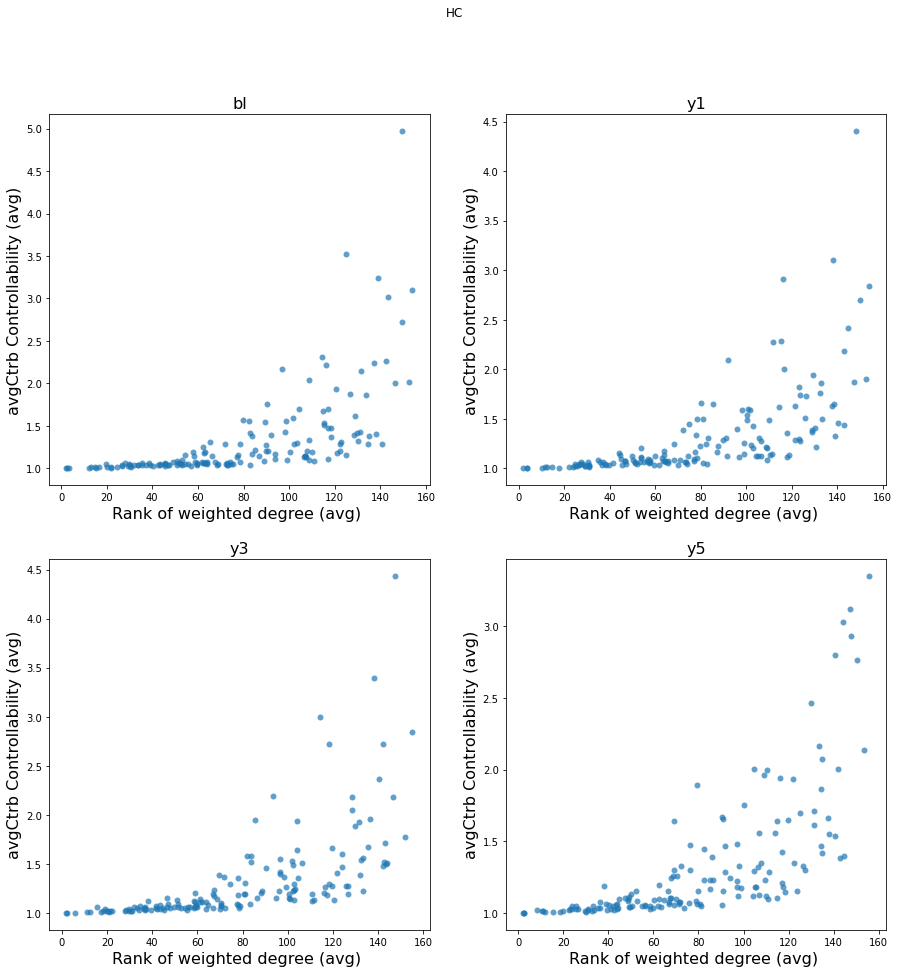

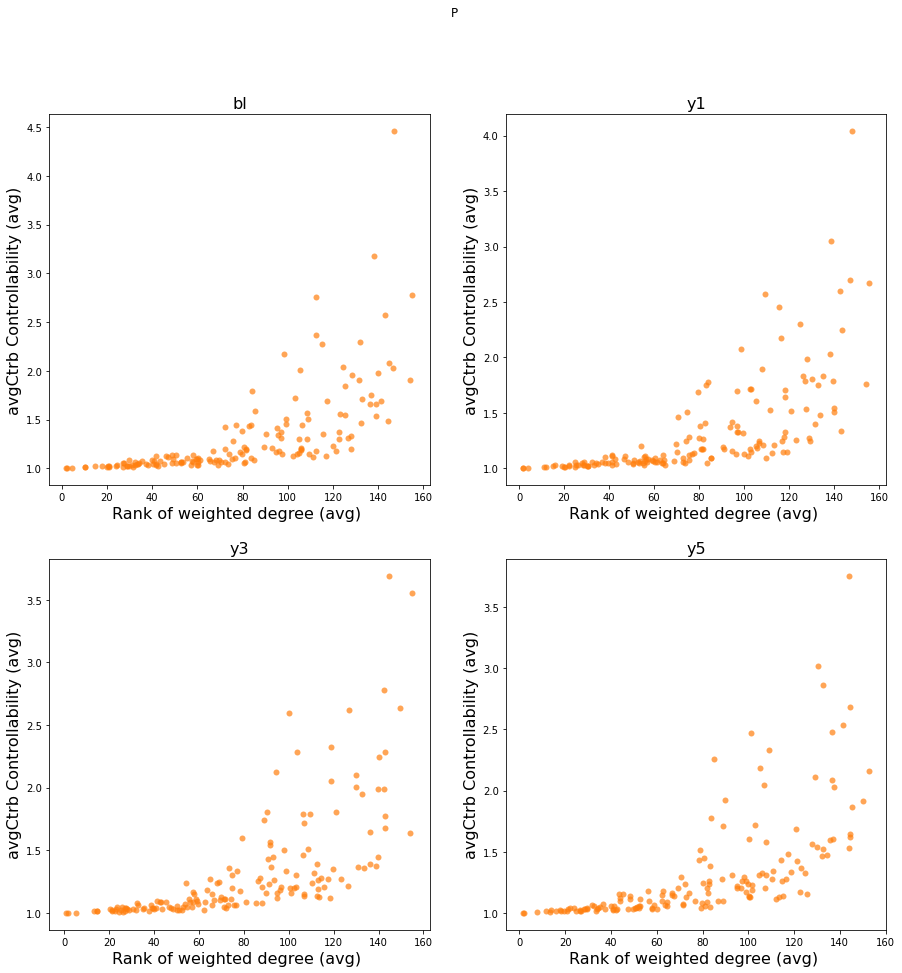

In [34]:
# plt.style.use('ggplot')
SAVE_FLAG = False
# Load region list
metadata, regionList = prev_fct.load_meta_data()
plot_axis = {'bl': (0,0), 'y1': (0,1), 'y3': (1,0), 'y5': (1,1)}
individual_data = myFunc.load_from_pickle(PICKLE_PATH, 'Normalized_Connectomes.pkl')
rank_type = 'avgCtrb'
xlabel = 'Rank of weighted degree (avg) '
ylabel = f'{rank_type} Controllability (avg)'
FIGURE_PATH = '../PREVENT_Study/figures/ctrb_variability/XX/'
for patient_type in ['HC', 'P']:
    fig, axs = plt.subplots(2, 2, figsize=(15, 15))
    if patient_type == 'HC':
        color = "tab:blue"
    if patient_type == 'P':
        color = 'tab:orange'
    for time in ['bl', 'y1', 'y3', 'y5']:
        data = individual_data[patient_type+time]
        # Average ctrb. values per region
        avg_y = {r: 0.0 for r in regionList}
        avg_x = {r: 0.0 for r in regionList}
        for pid, G in data.items():
            for reg, val in nx.get_node_attributes(G, 'weightRank').items():
                avg_x[reg] += val
            for reg, val in nx.get_node_attributes(G, rank_type).items():
                avg_y[reg] += val
        n = len(data)
        if n == 0:
            print("n is 0", patient_type, time)
        y = np.array([v/n for v in avg_y.values()])
        x = np.array([v/n for v in avg_x.values()])
        slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
        fig.suptitle(patient_type)
        # title = time + " " + f'(r={r:.2f}, p={p:.2e})'
        title = time
        axs[plot_axis[time][0], plot_axis[time][1]].scatter(x, y, linewidth=0, c=color, alpha=0.7)
        # axs[plot_axis[time][0], plot_axis[time][1]].plot(x, intercept + slope * x, c='red')
        axs[plot_axis[time][0], plot_axis[time][1]].set_xlabel(xlabel, fontsize=16)
        axs[plot_axis[time][0], plot_axis[time][1]].set_ylabel(ylabel, fontsize=16)
        axs[plot_axis[time][0], plot_axis[time][1]].set_title(title, fontsize=16, color='black')

        if time == 'bl':
            print(min(y), max(y))
    fig.suptitle(patient_type, color='black')
    if SAVE_FLAG:
        figName = f'{FIGURE_PATH}{patient_type}-{rank_type}.png'
        print("Saving...", figName)
        plt.savefig(figName, dpi=300, facecolor=fig.get_facecolor(), edgecolor='none', bbox_inches='tight')
        plt.close(fig)